In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# Step 1: Load dataset
df = pd.read_csv("D:\Projects\Elevate\Task 7 + 8\Mall_Customers.csv")
print("Dataset Head:\n", df.head())
print("\nInfo:\n", df.info())

Dataset Head:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Info:
 None


In [4]:
# Step 2: Select numerical features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Step 3: Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

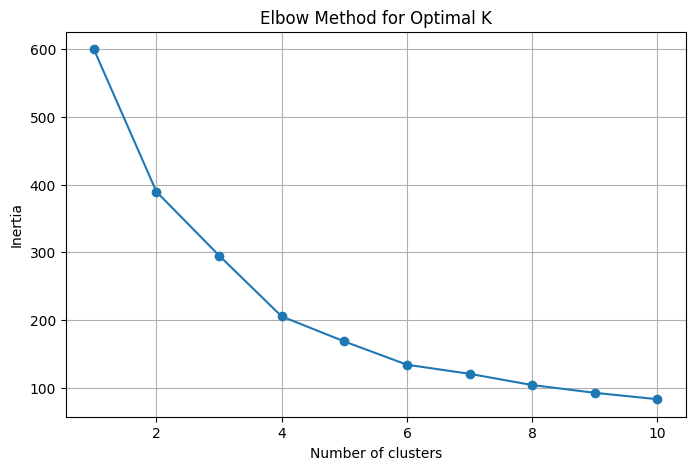

In [7]:
# Step 4: Use the Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [8]:
# Step 5: Fit KMeans with optimal K (e.g., K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
df['Cluster'] = cluster_labels

In [9]:
# Step 6: Evaluate with silhouette score
score = silhouette_score(scaled_features, cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.41664341513732767


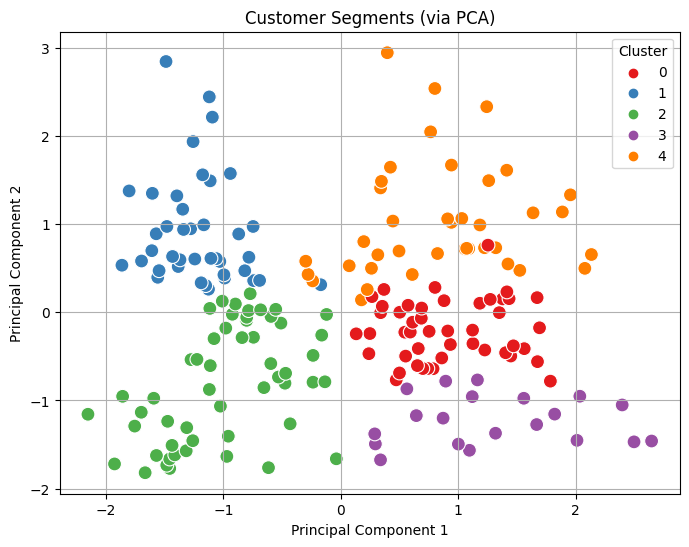

In [10]:
# Step 7: Visualize the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1],
                hue=cluster_labels, palette='Set1', s=100)
plt.title('Customer Segments (via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()